In [2]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType
import csvStructures as csvStruc
import matplotlib
import matplotlib.pyplot as plt
import sillyFunctions as ezFunc

electiondata = csvStruc.spark.read.csv(
        "hdfs://localhost:9000/user/steez/indianElections/Loksabha_1962-2019.csv",
        schema=csvStruc.electionsSchema)

+---------+
|namespace|
+---------+
|  default|
+---------+



In [3]:
electiondata.printSchema()

root
 |-- city: string (nullable = true)
 |-- no: integer (nullable = true)
 |-- type: string (nullable = true)
 |-- state: string (nullable = true)
 |-- candidate: string (nullable = true)
 |-- party: string (nullable = true)
 |-- electors: string (nullable = true)
 |-- votes: string (nullable = true)
 |-- turnout: string (nullable = true)
 |-- margin: string (nullable = true)
 |-- margin%: string (nullable = true)
 |-- year: integer (nullable = true)



In [4]:
pollutiondata = csvStruc.spark.read.csv(
        "hdfs://localhost:9000/user/steez/pollution/data.csv",
        schema=csvStruc.pollutionSchema)

In [5]:
pollutiondata.show(5)

+--------+------------------+--------------+---------+------+--------------------+----+----+----+----+---------------------------+-----+----------+
|stn_code|     sampling_date|         state| location|agency|                type| so2| no2|rspm| spm|location_monitoring_station|pm2_5|      date|
+--------+------------------+--------------+---------+------+--------------------+----+----+----+----+---------------------------+-----+----------+
|stn_code|     sampling_date|         state| location|agency|                type|null|null|null|null|       location_monitori...| null|      date|
|     150|February - M021990|Andhra Pradesh|Hyderabad|    NA|Residential, Rura...| 4.8|17.4|null|null|                         NA| null|1990-02-01|
|     151|February - M021990|Andhra Pradesh|Hyderabad|    NA|     Industrial Area| 3.1| 7.0|null|null|                         NA| null|1990-02-01|
|     152|February - M021990|Andhra Pradesh|Hyderabad|    NA|Residential, Rura...| 6.2|28.5|null|null|          

In [6]:
economic_info_data = csvStruc.spark.read.csv(
        "hdfs://localhost:9000/user/steez/socioEconomicData/india.csv",
        schema=csvStruc.economicInfoSchema)

In [7]:
economic_info_data.show(5)

+--------------------+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+-----------------+
|               state|1990|1991|1992| 1993| 1994| 1995| 1996| 1997| 1998| 1999| 2000| 2001| 2002| 2003| 2004| 2005| 2006| 2007| 2008| 2009| 2010| 2011| 2012| 2013| 2014|  2015|  2016|  2017|  2018|  2019|  2020|  2021|  2022|         category|
+--------------------+----+----+----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+------+------+------+------+------+------+-----------------+
|               state|1990|1991|1992| 1993| 1994| 1995| 1996| 1997| 1998| 1999| 2000| 2001| 2002| 2003| 2004| 2005| 2006| 2007| 2008| 2009| 2010| 2011| 2012| 2013| 2014|  2015|  2016|  2017|  2018|  2019|  2020|  2021|  2022|         CATEGORY|
|Andaman & Nicobar...|25

In [8]:
population_data_2001 = csvStruc.spark.read.csv(
        "hdfs://localhost:9000/user/steez/populationCensusByYear/data_2001.csv",
        schema=csvStruc.populationSchema)

In [9]:
population_data_2001.show(5)

+-------------+----+----------------+----------------+---------------------+-----------------------+
|         city|year|total_households|total_population|total_male_population|total_female_population|
+-------------+----+----------------+----------------+---------------------+-----------------------+
|         NAME|null|            null|            null|                 null|                   null|
|  WEST BENGAL|2001|        15872083|        80176197|             41465985|               38710212|
|  UTTARANCHAL|2001|         1603242|         8489349|              4325924|                4163425|
|UTTAR PRADESH|2001|        25757640|       166197921|             87565369|               78632552|
|      TRIPURA|2001|          664334|         3199203|              1642225|                1556978|
+-------------+----+----------------+----------------+---------------------+-----------------------+
only showing top 5 rows



In [10]:
all_population_data = csvStruc.spark.read.csv(
        "hdfs://localhost:9000/user/steez/populationCensusByYear/all_years.csv",
        schema=csvStruc.populationSchema)

In [11]:
all_population_data.show(5)

+-------------+----+----------------+----------------+---------------------+-----------------------+
|         city|year|total_households|total_population|total_male_population|total_female_population|
+-------------+----+----------------+----------------+---------------------+-----------------------+
|         NAME|null|            null|            null|                 null|                   null|
|  WEST BENGAL|2001|        15872083|        80176197|             41465985|               38710212|
|  UTTARANCHAL|2001|         1603242|         8489349|              4325924|                4163425|
|UTTAR PRADESH|2001|        25757640|       166197921|             87565369|               78632552|
|      TRIPURA|2001|          664334|         3199203|              1642225|                1556978|
+-------------+----+----------------+----------------+---------------------+-----------------------+
only showing top 5 rows



In [12]:
pollutiondatadf = pollutiondata.toPandas()

<Axes: >

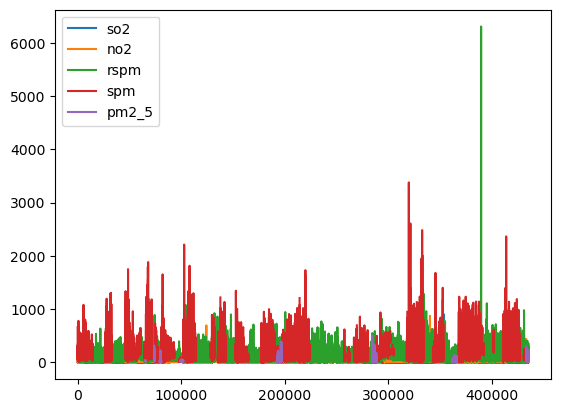

In [13]:
pollutiondatadf.plot()

In [14]:
test = ezFunc.extractint('bbbb33hh6h2h11')

In [15]:
print(test)

336211


In [16]:
pollutiondatadf["sampling_date"] = pollutiondatadf["sampling_date"].apply(ezFunc.extractint)

In [17]:
pollutiondatadf["sampling_date"] = pollutiondatadf["sampling_date"].apply(ezFunc.givethegoodyear)

In [18]:
grouped_by_year_state_type = pollutiondatadf.groupby(["sampling_date", "state"])["so2", "no2", "rspm"].aggregate('mean')

C:\Users\steez\AppData\Local\Temp\ipykernel_24368\1345836536.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_by_year_state_type = pollutiondatadf.groupby(["sampling_date", "state"])["so2", "no2", "rspm"].aggregate('mean')


In [19]:
print(grouped_by_year_state_type)

                                   so2        no2  rspm
sampling_date state                                    
1987          Bihar          23.660000  29.463636   NaN
              Delhi          15.991303  18.700001   NaN
              Goa             4.318182   8.758823   NaN
              Gujarat        18.204477  27.465672   NaN
              Haryana        43.480000  18.577778   NaN
...                                ...        ...   ...
2088          Odisha               NaN        NaN   NaN
              Puducherry     13.400000  13.200000   NaN
              Punjab         17.400000  34.500000   NaN
              Rajasthan      33.200001  55.000000   NaN
              Uttar Pradesh  28.800001  23.900002   NaN

[827 rows x 3 columns]


In [20]:
grouped_by_yearonly = pollutiondatadf.groupby(["date", "state"])["so2", "no2", "rspm"].aggregate('mean')

C:\Users\steez\AppData\Local\Temp\ipykernel_24368\1685270313.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_by_yearonly = pollutiondatadf.groupby(["date", "state"])["so2", "no2", "rspm"].aggregate('mean')


In [21]:
print((grouped_by_yearonly))

                                              so2        no2   rspm
date       state                                                   
1987-01-01 Gujarat                      19.699999  15.000000    NaN
           Rajasthan                          NaN        NaN    NaN
           Uttar Pradesh                16.100000        NaN    NaN
           West Bengal                  65.150002  86.366669    NaN
1987-01-02 Gujarat                      26.450001  45.400002    NaN
...                                           ...        ...    ...
NA         Maharashtra                  11.500000  33.000000   92.0
           Odisha                        9.000000  14.000000  105.0
           Tripura                            NaN        NaN    NaN
           andaman-and-nicobar-islands        NaN        NaN    NaN
date       state                              NaN        NaN    NaN

[84415 rows x 3 columns]


In [22]:
base_group_by = pollutiondatadf.groupby(["sampling_date", "state"])

In [23]:
grouped_by_state = pollutiondatadf.groupby(["state"])["so2", "no2", "rspm"].aggregate('mean')

C:\Users\steez\AppData\Local\Temp\ipykernel_24368\4237236797.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_by_state = pollutiondatadf.groupby(["state"])["so2", "no2", "rspm"].aggregate('mean')


In [24]:
print(grouped_by_state)

                                   so2        no2        rspm
state                                                        
Andhra Pradesh                7.284844  21.704451   78.182823
Arunachal Pradesh             3.179105   5.469697   76.629211
Assam                         6.723263  14.793691   93.724915
Bihar                        19.381475  36.575523  123.705177
Chandigarh                    2.676986  18.619404   96.587082
Chhattisgarh                 12.846609  24.815960  126.472397
Dadra & Nagar Haveli          8.939587  18.293959   76.536530
Daman & Diu                   8.192958  16.168926   73.749428
Delhi                         8.737273  53.489147  196.639771
Goa                           6.827913  12.506337   61.212765
Gujarat                      16.656343  24.065630   98.244507
Haryana                      14.064957  23.428310  149.860535
Himachal Pradesh              2.667013  13.658688   91.870201
Jammu & Kashmir               7.180521  12.213181  117.449486
Jharkhan

In [25]:
# grouped_by_state.plot.bar()

In [26]:
#onlyAndhra = pollutiondatadf.loc[pollutiondatadf["state"]] == "Andhra Pradesh"
onlyAndhra = pollutiondatadf[pollutiondatadf.state == 'Andhra Pradesh']
print(onlyAndhra)

      stn_code sampling_date           state     location  \
1          150          1990  Andhra Pradesh    Hyderabad   
2          151          1990  Andhra Pradesh    Hyderabad   
3          152          1990  Andhra Pradesh    Hyderabad   
4          150          1990  Andhra Pradesh    Hyderabad   
5          151          1990  Andhra Pradesh    Hyderabad   
...        ...           ...             ...          ...   
26364      757          2015  Andhra Pradesh  Rajahmundry   
26365      757          2015  Andhra Pradesh  Rajahmundry   
26366      757          2015  Andhra Pradesh  Rajahmundry   
26367      757          2015  Andhra Pradesh  Rajahmundry   
26368      757          2015  Andhra Pradesh  Rajahmundry   

                                             agency  \
1                                                NA   
2                                                NA   
3                                                NA   
4                                              

In [27]:
onlyAndhraGrouped = onlyAndhra.groupby(["date"])["so2", "no2", "rspm"].aggregate('max')

C:\Users\steez\AppData\Local\Temp\ipykernel_24368\3653137387.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  onlyAndhraGrouped = onlyAndhra.groupby(["date"])["so2", "no2", "rspm"].aggregate('max')


In [28]:
print(onlyAndhraGrouped)

             so2        no2   rspm
date                              
1990-02-01   6.2  28.500000    NaN
1990-03-01   6.4  25.700001    NaN
1990-04-01   5.4  23.000000    NaN
1990-05-01   4.0  18.600000    NaN
1990-06-01   5.6  19.299999    NaN
...          ...        ...    ...
2015-12-19  11.0  29.000000   80.0
2015-12-22   9.0  55.000000  121.0
2015-12-24   6.0  56.000000  123.0
2015-12-25   9.0  28.000000   96.0
2015-12-28   7.0  53.000000  119.0

[3670 rows x 3 columns]


<Axes: xlabel='date'>

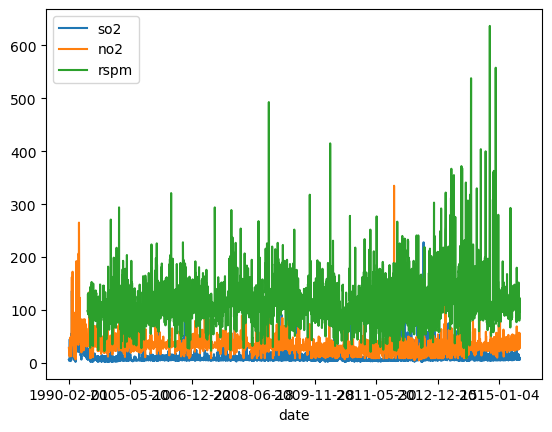

In [29]:
onlyAndhraGrouped.plot.line()

In [30]:
onlyAndhraUpdated = onlyAndhra
onlyAndhraUpdated["date"].apply(ezFunc.cut_years)

1        1990
2        1990
3        1990
4        1990
5        1990
         ... 
26364    2015
26365    2015
26366    2015
26367    2015
26368    2015
Name: date, Length: 26368, dtype: object

In [31]:
print(onlyAndhraUpdated)

      stn_code sampling_date           state     location  \
1          150          1990  Andhra Pradesh    Hyderabad   
2          151          1990  Andhra Pradesh    Hyderabad   
3          152          1990  Andhra Pradesh    Hyderabad   
4          150          1990  Andhra Pradesh    Hyderabad   
5          151          1990  Andhra Pradesh    Hyderabad   
...        ...           ...             ...          ...   
26364      757          2015  Andhra Pradesh  Rajahmundry   
26365      757          2015  Andhra Pradesh  Rajahmundry   
26366      757          2015  Andhra Pradesh  Rajahmundry   
26367      757          2015  Andhra Pradesh  Rajahmundry   
26368      757          2015  Andhra Pradesh  Rajahmundry   

                                             agency  \
1                                                NA   
2                                                NA   
3                                                NA   
4                                              

In [32]:
onlyAndhraYearsGroupedMax = onlyAndhraUpdated.groupby(["date"])["so2", "no2", "rspm"].aggregate('max')
onlyAndhraYearsGroupedMean = onlyAndhraUpdated.groupby(["date"])["so2", "no2", "rspm"].aggregate('mean')

C:\Users\steez\AppData\Local\Temp\ipykernel_24368\2502252003.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  onlyAndhraYearsGroupedMax = onlyAndhraUpdated.groupby(["date"])["so2", "no2", "rspm"].aggregate('max')
C:\Users\steez\AppData\Local\Temp\ipykernel_24368\2502252003.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  onlyAndhraYearsGroupedMean = onlyAndhraUpdated.groupby(["date"])["so2", "no2", "rspm"].aggregate('mean')


In [33]:
print(onlyAndhraYearsGroupedMax)
print(onlyAndhraYearsGroupedMean)

             so2        no2   rspm
date                              
1990-02-01   6.2  28.500000    NaN
1990-03-01   6.4  25.700001    NaN
1990-04-01   5.4  23.000000    NaN
1990-05-01   4.0  18.600000    NaN
1990-06-01   5.6  19.299999    NaN
...          ...        ...    ...
2015-12-19  11.0  29.000000   80.0
2015-12-22   9.0  55.000000  121.0
2015-12-24   6.0  56.000000  123.0
2015-12-25   9.0  28.000000   96.0
2015-12-28   7.0  53.000000  119.0

[3670 rows x 3 columns]
                 so2        no2       rspm
date                                      
1990-02-01  4.700000  17.633333        NaN
1990-03-01  5.800000  15.966667        NaN
1990-04-01  4.766666  16.266666        NaN
1990-05-01  3.800000  13.750000        NaN
1990-06-01  4.266667  15.066667        NaN
...              ...        ...        ...
2015-12-19  8.333333  19.250000  67.916664
2015-12-22  6.500000  23.583334  71.041664
2015-12-24  5.307693  28.230770  79.923080
2015-12-25  7.416667  18.416666  71.333336
2015

<Axes: xlabel='date'>

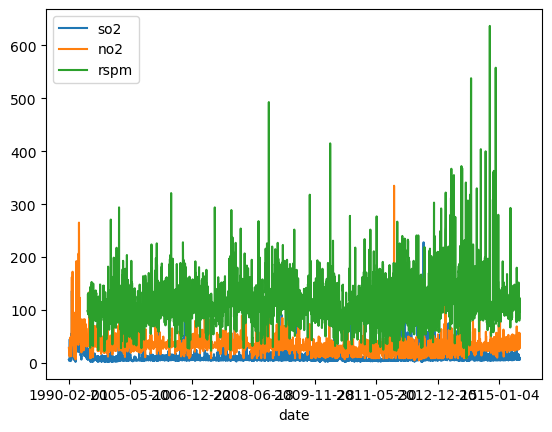

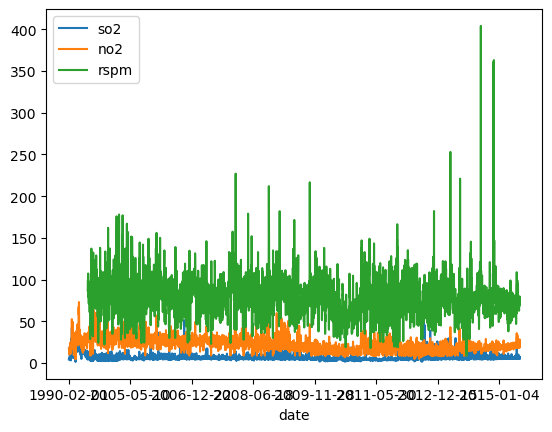

In [34]:
onlyAndhraYearsGroupedMax.plot.line()
onlyAndhraYearsGroupedMean.plot.line()

In [35]:
all_population_data_df = all_population_data.toPandas()

In [60]:
pollutiondatadf_filtered_years = pollutiondatadf

In [65]:
pollutiondatadf_filtered_years["date"] = pollutiondatadf_filtered_years["date"].apply(ezFunc.cut_years)

In [66]:
print(pollutiondatadf_filtered_years)

        stn_code sampling_date                        state   location  \
0       stn_code          2000                        state   location   
1            150          1990               Andhra Pradesh  Hyderabad   
2            151          1990               Andhra Pradesh  Hyderabad   
3            152          1990               Andhra Pradesh  Hyderabad   
4            150          1990               Andhra Pradesh  Hyderabad   
...          ...           ...                          ...        ...   
435738      SAMP          2015                  West Bengal   ULUBERIA   
435739      SAMP          2015                  West Bengal   ULUBERIA   
435740        NA          2000  andaman-and-nicobar-islands         NA   
435741        NA          2000                  Lakshadweep         NA   
435742        NA          2000                      Tripura         NA   

                                           agency  \
0                                          agency   
1    

In [68]:
all_population_data_df_by_year = all_population_data_df.groupby(["city", "year"])["total_population"].aggregate('max')
print(all_population_data_df_by_year)

city                       year  
ANDAMAN & NICOBAR ISLANDS  2001.0    356152.0
                           2002.0    239954.0
                           2003.0    239954.0
                           2004.0    239954.0
                           2005.0    239954.0
                                       ...   
Zunheboto                  2013.0    113160.0
                           2014.0    113160.0
                           2015.0    113160.0
                           2016.0    113160.0
                           2017.0    113160.0
Name: total_population, Length: 11577, dtype: float64


In [40]:
ezFunc.get_pollution_by_city_and_year(city = 'hihi')

hihi



In [57]:
print(grouped_by_year_state_type)

                                   so2        no2  rspm
sampling_date state                                    
1987          Bihar          23.660000  29.463636   NaN
              Delhi          15.991303  18.700001   NaN
              Goa             4.318182   8.758823   NaN
              Gujarat        18.204477  27.465672   NaN
              Haryana        43.480000  18.577778   NaN
...                                ...        ...   ...
2088          Odisha               NaN        NaN   NaN
              Puducherry     13.400000  13.200000   NaN
              Punjab         17.400000  34.500000   NaN
              Rajasthan      33.200001  55.000000   NaN
              Uttar Pradesh  28.800001  23.900002   NaN

[827 rows x 3 columns]
